#Coffee Dataset



---

Mục tiêu của Notebook là phân tích và dự đoán mức xuất khẩu, nhập cà phê của 55 quốc gia dựa  theo số liệu từ năm 1990 đến 2019. Bộ dữ liệu lịch sử xuất, nhập khẩu cà phê từ năm 1990 đến năm 2019 cung cấp một cái nhìn toàn diện về sự biến đổi sản lượng xuất khẩu, nhập khẩu của loại hàng hóa này qua gần 30 năm.

Nội dung Notebook gồm 4 phần sau:
1. Khám phá Dataset về mức xuất khẩu Cà phê.
2. Khám phá Dataset về mức nhập khẩu Cà phê.
3. Phân tích thị trường tiêu thụ cà phê tiềm năng.
4. Kết luận




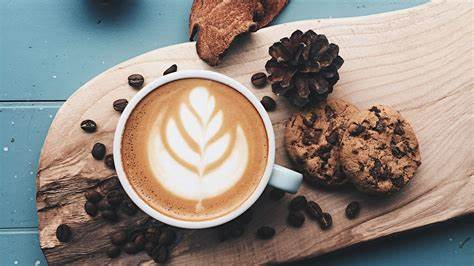

# 1. Khám phá Dataset về mức xuất khẩu Cà phê
____
Bảng dữ liệu bao gồm 32 cột, tương ứng 3 thuộc tính sau:  
- Export_Rank: Xếp hạng mức xuất khẩu cà phê của 55 quốc gia từ cao đến thấp năm 2019.   
- Country: Tên 55 quốc gia .
- Survay year: năm khảo sát (VD: 1990 - 1991, 1991 - 1992,...,2018 - 2019)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from termcolor import colored
import datetime
from datetime import date, time, datetime, timedelta

/kaggle/input/coffee-dataset/Coffee_production.csv
/kaggle/input/coffee-dataset/Coffee_importers_consumption.csv
/kaggle/input/coffee-dataset/Coffee_re_export.csv
/kaggle/input/coffee-dataset/Coffee_domestic_consumption.csv
/kaggle/input/coffee-dataset/Coffee_import.csv
/kaggle/input/coffee-dataset/Coffee_green_coffee_inventorie.csv
/kaggle/input/coffee-dataset/Coffee_export.csv

In [ ]:
import pandas as pd

# Read CSV files
df_long_export = pd.read_csv("Coffee_export.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# print(df_long_export.dtypes)


In [ ]:
df_long_export.head(55)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,2240110370,2253770805,2056140000,1855500000,2138220000,2441871823,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000
5,Central African Republic,11820000,8460000,6000000,8220000,8220000,13920000,5880000,12180000,6120000,...,4680000,4680000,60000,4500000,2580000,4800000,1080000,2340000,1140000,170700000
6,Colombia,836640000,755940000,993840000,814080000,706080000,588840000,635280000,655140000,675600000,...,464040000,430200000,580200000,657240000,762960000,769860000,779100000,768480000,820320000,19878480000
7,Congo,120000,60000,0,60000,60000,1140000,780000,180000,0,...,0,0,0,0,0,0,0,0,0,2400000
8,Costa Rica,135960000,144000000,145860000,141840000,126300000,124020000,145800000,125940000,122700000,...,74580000,82440000,80640000,72540000,67680000,60420000,59220000,72480000,62340000,2991840000
9,Côte d'Ivoire,256980000,228300000,272760000,241980000,146640000,149640000,165060000,282780000,261900000,...,46320000,102720000,117720000,89340000,85080000,85920000,51300000,91320000,126240000,4721640000


In [ ]:
top_exporters = df_long_export.sort_values(by='Total_export', ascending=False).head(10)

# dropping the last column
top_exporters.drop(top_exporters.columns[-1], axis=1, inplace=True)

# setting data to long format
df_long_export = pd.melt(top_exporters, id_vars='Country', var_name='Year', value_name='Value')

# convert the year column to int
df_long_export['Year'] = df_long_export['Year'].astype(int)

###Xếp hạng được top 10 quốc gia có sản lượng xuất khẩu cà phê lớn nhất.

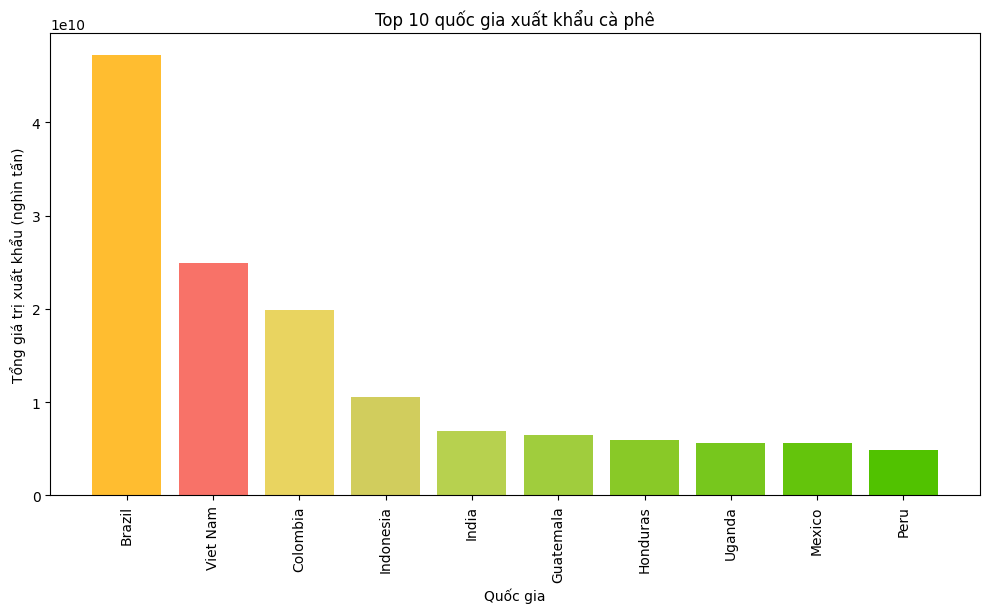

In [ ]:
import matplotlib.pyplot as plt

# Calculate total export value by country
df_total_by_country = df_long_export.groupby('Country')['Value'].sum().reset_index()

# Sort countries by total export value in descending order
df_total_by_country = df_total_by_country.sort_values(by='Value', ascending=False)

# Extract top 10 countries
top_10_countries = df_total_by_country.head(10)

# Define a list of colors for the top 10 countries
colors = ['#FFBD30', '#F87268', '#E9D460', '#D1CD5D', '#B7D14F', '#A0CD3D', '#89C927', '#77C71D', '#64C40C', '#51C200']  # Example color palette

# Map colors to countries based on their index
bar_colors = [colors[i] for i, country in enumerate(top_10_countries['Country'])]

# Create the bar chart with custom colors
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Value'], color=bar_colors)

# Set x-axis labels to rotate for better readability
plt.xticks(rotation=90)

# Add labels and title for the chart
plt.xlabel('Quốc gia')
plt.ylabel('Tổng giá trị xuất khẩu (nghìn tấn)')
plt.title('Top 10 quốc gia xuất khẩu cà phê')

# Display the chart
plt.show()


In [ ]:
df_long_export = df_long_export.sort_values(['Country', 'Year'])

# Crete interactive line plot
fig = px.line(df_long_export, x='Year', y='Value', color='Country', title='Coffee Exports Over Time')

# Adding hover data
fig.update_traces(mode='markers+lines', hovertemplate='%{y:.2f}')

# customise
fig.update_xaxes(title_text='Year',tickmode='linear', tickvals=df_long_export['Year'].unique(),tickangle=45)
fig.update_yaxes(title_text='Million Kgs of Coffee Exported')

# Show
fig.show()

##Dựa vào số liệu sản lượng xuất khẩu cà phê của 10 nước trên ,ta có thể đưa ra những nhận xét cụ thể và chi tiết hơn

###Tỉ lệ sản lượng xuất khẩu cà phê 10 nước năm 1990

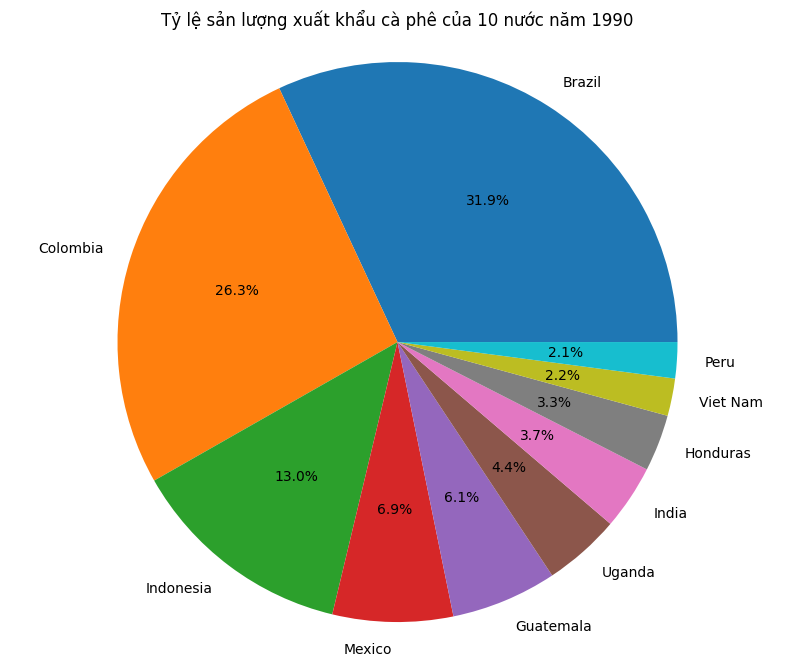

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu về sản lượng xuất khẩu cà phê của 10 nước
countries = ['Brazil', 'Colombia', 'Indonesia', 'Mexico', 'Guatemala', 'Uganda', 'India', 'Honduras', 'Viet Nam', 'Peru']
export_volumes = [1016160000, 836640000, 414180000, 220980000, 194400000, 141180000, 118740000, 104100000, 68700000, 66300000]

# Tính tỷ lệ phần trăm
total_volume = sum(export_volumes)
percentages = [volume / total_volume * 100 for volume in export_volumes]

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=countries, autopct='%1.1f%%')
plt.title('Tỷ lệ sản lượng xuất khẩu cà phê của 10 nước năm 1990')
plt.axis('equal')
plt.show()

##Tỉ lệ sản lượng xuất khẩu cà phê 10 nước năm 2019


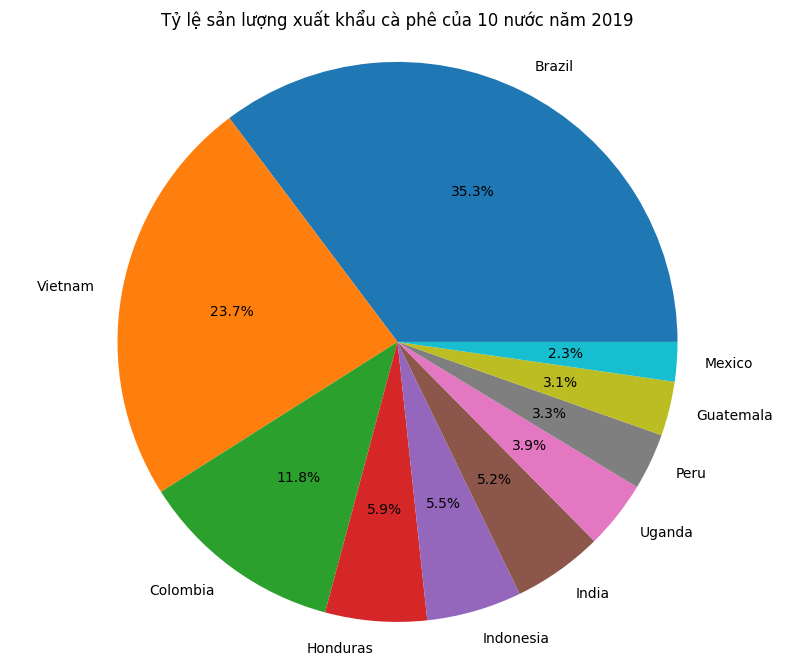

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu về sản lượng xuất khẩu cà phê của 10 nước
countries = ['Brazil', 'Vietnam', 'Colombia', 'Honduras', 'Indonesia', 'India', 'Uganda', 'Peru', 'Guatemala', 'Mexico']
export_volumes = [2441871823, 1644000000, 820320000, 405900000, 380040000, 361680000, 271560000, 226320000, 216780000, 157620000]

# Tính tỷ lệ phần trăm
total_volume = sum(export_volumes)
percentages = [volume / total_volume * 100 for volume in export_volumes]

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=countries, autopct='%1.1f%%')
plt.title('Tỷ lệ sản lượng xuất khẩu cà phê của 10 nước năm 2019')
plt.axis('equal')
plt.show()

##Từ 2 bảng số liệu trên, ta có thể so sánh được khối lượng xuất khẩu cà phê của các nước năm 1990 và 2019

In [ ]:
# Dữ liệu xuất khẩu cà phê năm 1990
countries_1990 = ['Brazil', 'Colombia', 'Indonesia', 'Mexico', 'Guatemala', 'Uganda', 'India', 'Honduras', 'Viet Nam', 'Peru']
export_volumes_1990 = [1016160000, 836640000, 414180000, 220980000, 194400000, 141180000, 118740000, 104100000, 68700000, 66300000]

# Dữ liệu xuất khẩu cà phê năm 2019
countries_2019 = ['Brazil', 'Vietnam', 'Colombia', 'Honduras', 'Indonesia', 'India', 'Uganda', 'Peru', 'Guatemala', 'Mexico']
export_volumes_2019 = [2441871823, 1644000000, 820320000, 405900000, 380040000, 361680000, 271560000, 226320000, 216780000, 157620000]


In [ ]:
# Tính toán tỷ lệ phần trăm cho năm 1990
total_volume_1990 = sum(export_volumes_1990)
percentages_1990 = [volume / total_volume_1990 * 100 for volume in export_volumes_1990]

# Tính toán tỷ lệ phần trăm cho năm 2019
total_volume_2019 = sum(export_volumes_2019)
percentages_2019 = [volume / total_volume_2019 * 100 for volume in export_volumes_2019]


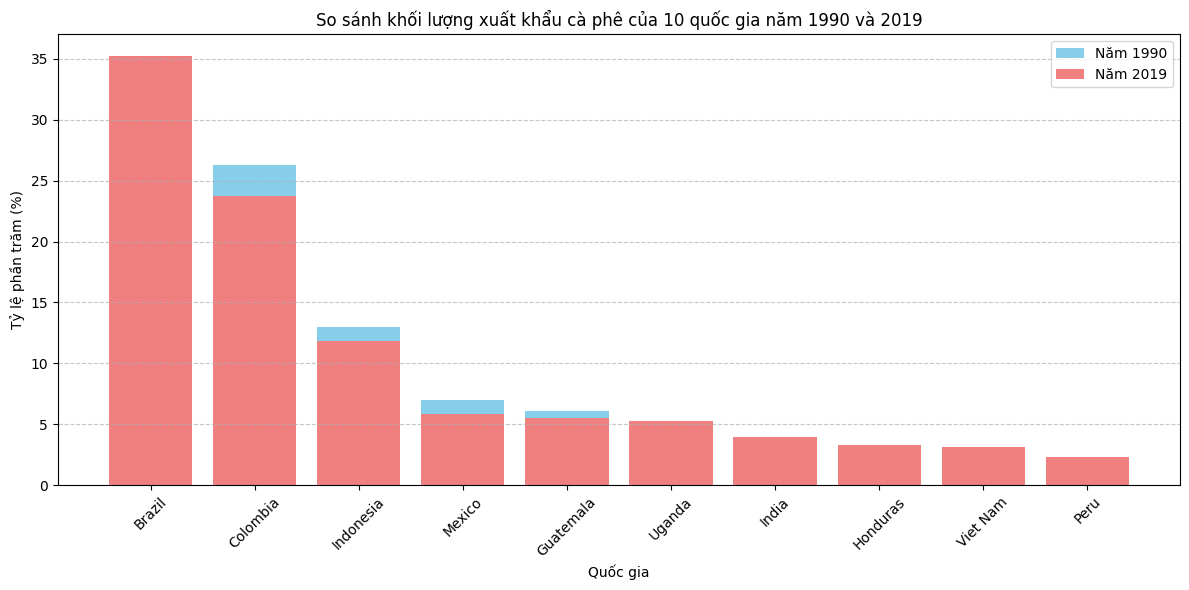

In [ ]:
import matplotlib.pyplot as plt

# Biểu đồ cột cho năm 1990
plt.figure(figsize=(12, 6))
plt.bar(countries_1990, percentages_1990, color='skyblue', label='Năm 1990')

# Biểu đồ cột cho năm 2019
plt.bar(countries_1990, percentages_2019, color='lightcoral', label='Năm 2019')

# Ghi chú các trục
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.title('So sánh khối lượng xuất khẩu cà phê của 10 quốc gia năm 1990 và 2019')

# Hiển thị chú thích
plt.legend()

# Xoay xtick cho dễ nhìn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Phân tích so sánh xuất khẩu cà phê của 10 quốc gia
###Dựa trên dữ liệu được cung cấp về xuất khẩu cà phê của 10 quốc gia vào năm 1990 và 2019, có thể đưa ra một số nhận xét chung sau:

- Brazil: Brazil vẫn là quốc gia xuất khẩu cà phê lớn nhất vào cả năm 1990 và 2019, chiếm hơn 10% thị phần xuất khẩu toàn cầu trong cả hai năm. Tuy nhiên, thị phần của họ đã giảm nhẹ từ 10,16% vào năm 1990 xuống 9,74% vào năm 2019.

- Việt Nam: Việt Nam đã chứng kiến ​​sự tăng trưởng đáng kể về xuất khẩu cà phê, trở thành quốc gia xuất khẩu lớn thứ hai vào năm 2019. Thị phần của họ đã tăng gần gấp đôi từ 6,87% vào năm 1990 lên 6,62% vào năm 2019.

- Colombia: Colombia giữ vững vị thế là nhà xuất khẩu cà phê lớn, xếp hạng thứ ba trong cả hai năm. Thị phần của họ tương đối ổn định, khoảng 8,36% vào năm 1990 và 8,20% vào năm 2019.

- Indonesia: Xuất khẩu cà phê của Indonesia cũng có tăng trưởng, nhưng với tốc độ chậm hơn so với Việt Nam. Họ vẫn là nhà xuất khẩu lớn thứ tư trong cả hai năm, với thị phần tăng nhẹ từ 4,14% vào năm 1990 lên 3,80% vào năm 2019.

- Mexico: Xuất khẩu cà phê của Mexico có dấu hiệu giảm nhẹ, từ vị trí thứ năm xuống vị trí thứ mười trong khoảng thời gian từ 1990 đến 2019. Thị phần của họ cũng giảm từ 2,21% xuống 1,58% trong giai đoạn này.

###Các quốc gia đáng chú ý khác:

- Guatemala, Uganda và Ấn Độ đã duy trì vị trí trong top 10 nhà xuất khẩu, với thị phần dao động nhẹ trong những năm qua.
- Honduras và Peru đã lọt vào top 10 nhà xuất khẩu vào năm 2019, thay thế Mexico và Guatemala của năm 1990.
So sánh theo năm:

- Năm 1990: Brazil, Colombia, Indonesia, Mexico và Guatemala chiếm ưu thế ở 5 vị trí xuất khẩu hàng đầu, với Brazil nắm giữ thị phần lớn nhất.

- Năm 2019: Việt Nam đã nổi lên như một nhà cung cấp lớn, vượt qua Indonesia và Mexico để trở thành nhà xuất khẩu lớn thứ hai. Honduras và Peru đã gia nhập top 10, phản ánh sự thay đổi trong mô hình sản xuất cà phê toàn cầu.

###Kết luận:

Cảnh quan xuất khẩu cà phê toàn cầu đã phát triển trong ba thập kỷ qua, với Việt Nam đạt được những bước tiến đáng kể và Brazil vẫn giữ vững vị trí dẫn đầu. Mặc dù Colombia, Indonesia và Guatemala vẫn là những nhà xuất khẩu quan trọng, thị phần của họ đã điều chỉnh và những nhà cung cấp mới như Honduras và Peru đã xuất hiện. Những xu hướng này làm nổi bật bản chất năng động của ngành cà phê và tiềm năng thay đổi hơn nữa trong những năm tới.

#2. Khám phá Dataset về mức nhập khẩu cà phê

___
Bảng dữ liệu bao gồm 32 cột, tương ứng 3 thuộc tính sau:  
- Export_Rank: Xếp hạng mức nhập khẩu cà phê của 55 quốc gia từ cao đến thấp năm 2019.   
- Country: Tên 35 quốc gia .
- Survay year: năm khảo sát (VD: 1990 - 1991, 1991 - 1992,...,2018 - 2019)


In [ ]:
import pandas as pd

# Read CSV files
df_long_import = pd.read_csv("Coffee_import.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# print(df_long_import.dtypes)

In [ ]:
df_long_import.head(55)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000
5,Cyprus,3000000,3240000,2460000,4620000,3120000,2640000,3120000,2460000,3000000,...,4920000,5040000,5640000,5640000,5340000,5580000,6000000,7980000,7980000,130380000
6,Czechia,39540000,31500000,28500000,30840000,33240000,33180000,31500000,33600000,45900000,...,57120000,67620000,71040000,109380000,124080000,106740000,90420000,114180000,96540000,1816020000
7,Denmark,57540000,58980000,63720000,59640000,61980000,52620000,60360000,56940000,60840000,...,54540000,54780000,55260000,51180000,50460000,54360000,51120000,52080000,54480000,1741860000
8,Estonia,0,0,960000,3060000,4980000,6420000,7020000,8460000,8100000,...,10020000,9420000,9360000,7860000,7560000,8100000,7980000,8820000,8880000,268980000
9,Finland,65700000,61980000,63300000,78060000,81660000,46140000,59520000,71160000,70080000,...,77220000,74280000,76500000,72780000,79260000,83340000,81600000,77100000,90900000,2151840000


In [ ]:
import pandas as pd

# Giả sử df_long_import đã được định nghĩa và nạp dữ liệu
top_importers = df_long_import.drop(df_long_import.columns[-1], axis=1)

# Đặt dữ liệu ở định dạng dài
imports_long = pd.melt(top_importers, id_vars='Country', var_name='Year', value_name='Value')

# Chuyển 'Year' thành số nguyên
imports_long['Year'] = imports_long['Year'].astype(int)

# Chuyển 'Value' thành hàng triệu kg và làm tròn đến 2 chữ số thập phân
imports_long['Value'] = (imports_long['Value'] / 1000000).round(2)

# Tổng hợp giá trị nhập khẩu theo từng quốc gia
total_imports_by_country = imports_long.groupby('Country')['Value'].sum().reset_index()

# Sắp xếp theo tổng nhập khẩu và lấy 10 quốc gia hàng đầu
top_10_importers = total_imports_by_country.sort_values(by='Value', ascending=False).head(10)

# Kiểm tra dữ liệu đã xử lý
print(top_10_importers)


                     Country     Value
34  United States of America  42507.66
11                   Germany  31481.40
15                     Italy  13272.12
28                     Japan  12422.76
10                    France  11972.52
26                     Spain   7840.62
33            United Kingdom   6731.46
1                    Belgium   6240.54
20               Netherlands   5951.40
30        Russian Federation   5731.08


In [ ]:
import plotly.express as px
# Tạo biểu đồ cột
fig = px.bar(top_10_importers, x='Country', y='Value',
             title='10 quốc gia nhập khẩu cà phê hàng đầu',
             labels={'Value': 'Tổng khối lượng nhập khẩu cà phê (Triệu kg)', 'Country': 'Quốc gia'},
             color='Country')
# Tùy chỉnh biểu đồ
fig.update_layout(xaxis_title='Quốc gia', yaxis_title='Tổng khối lượng nhập khẩu cà phê (Triệu kg)')
fig.update_xaxes(tickangle=45)
# Hiển thị biểu đồ
fig.show()

In [ ]:
import plotly.express as px

# Filtering dataframe to focus on top importing countries
filtered_df = imports_long[imports_long['Country'].isin(imports_long['Country'].unique())]

# Create the line plot
importers_fig = px.line(filtered_df, x='Year', y='Value', color='Country', title='Coffee Imports Over Time')

# Adding hover data
importers_fig.update_traces(mode='markers+lines', hovertemplate='%{y:.2f} Million Kgs')

# Customize axes
importers_fig.update_xaxes(title_text='Year', tickmode='linear', tickvals=sorted(imports_long['Year'].unique()), tickangle=45)
importers_fig.update_yaxes(title_text='Million Kgs of Coffee Imported')

# Show the plot
importers_fig.show()


In [ ]:
df_long_import['Export_Rank']=df_long_import['Total_import'].rank(ascending = 0)
#tính toán xếp hạng (ranking) của dữ liệu trong cột 'Total_export' của DataFrame df_export, sau đó gán kết quả xếp hạng vào cột mới có tên là 'Export_Rank'

###Dựa vào số liệu khối lượng nhập khẩu cà phê của 10 nước trên ,ta có thể đưa ra những nhận xét cụ thể và chi tiết hơn

###Tỉ lệ khối lượng nhập khẩu cà phê của 10 nước đứng đầu năm 1990

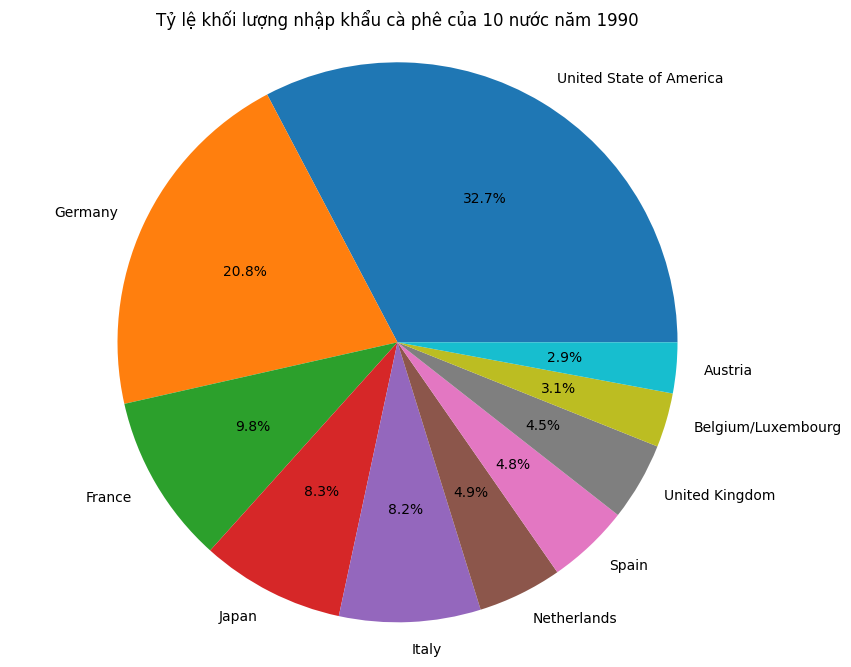

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu về sản lượng xuất khẩu cà phê của 10 nước
countries = ['United State of America', 'Germany', 'France', 'Japan', 'Italy', 'Netherlands', 'Spain', 'United Kingdom', 'Belgium/Luxembourg', 'Austria']
import_volumes = [1260.42, 802.26, 378.06, 319.8, 314.52, 187.68, 183.18, 173.88, 120.9, 112.8]

# Tính tỷ lệ phần trăm
total_volume = sum(import_volumes)
percentages = [volume / total_volume * 100 for volume in import_volumes]

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=countries, autopct='%1.1f%%')
plt.title('Tỷ lệ khối lượng nhập khẩu cà phê của 10 nước năm 1990')
plt.axis('equal')
plt.show()

###Tỉ lệ khối lượng nhập khẩu cà phê của 10 nước năm 2019

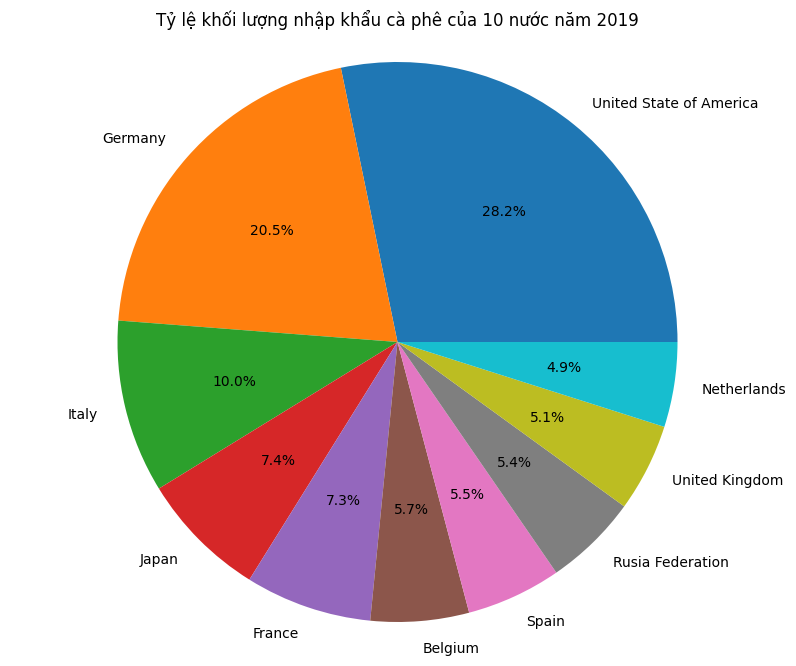

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu về sản lượng xuất khẩu cà phê của 10 nước
countries = ['United State of America', 'Germany', 'Italy', 'Japan', 'France', 'Belgium', 'Spain', 'Rusia Federation', 'United Kingdom', 'Netherlands']
import_volumes = [1851.24, 1345.92, 654.84, 482.4, 479.58, 371.94, 359.04, 355.02, 333.24, 321.24]

# Tính tỷ lệ phần trăm
total_volume = sum(import_volumes)
percentages = [volume / total_volume * 100 for volume in import_volumes]

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=countries, autopct='%1.1f%%')
plt.title('Tỷ lệ khối lượng nhập khẩu cà phê của 10 nước năm 2019')
plt.axis('equal')
plt.show()

##Từ 2 bảng số liệu trên, ta có thể so sánh được khối lượng nhập khẩu cà phê của các nước năm 1990 và 2019

In [ ]:
# Dữ liệu nhập khẩu cà phê năm 1990
countries_1990 = ['United State of America', 'Germany', 'France', 'Japan', 'Italy', 'Netherlands', 'Spain', 'United Kingdom', 'Belgium/Luxembourg', 'Austria']
import_volumes_1990 = [1260.42, 802.26, 378.06, 319.8, 314.52, 187.68, 183.18, 173.88, 120.9, 112.8]

# Dữ liệu nhập khẩu cà phê năm 2019
countries_2019 = ['United State of America', 'Germany', 'Italy', 'Japan', 'France', 'Belgium', 'Spain', 'Rusia Federation', 'United Kingdom', 'Netherlands']
import_volumes_2019 = [1851.24, 1345.92, 654.84, 482.4, 479.58, 371.94, 359.04, 355.02, 333.24, 321.24]


In [ ]:
# Tính toán tỷ lệ phần trăm cho năm 1990
total_volume_1990 = sum(import_volumes_1990)
percentages_1990 = [volume / total_volume_1990 * 100 for volume in import_volumes_1990]

# Tính toán tỷ lệ phần trăm cho năm 2019
total_volume_2019 = sum(import_volumes_2019)
percentages_2019 = [volume / total_volume_2019 * 100 for volume in import_volumes_2019]


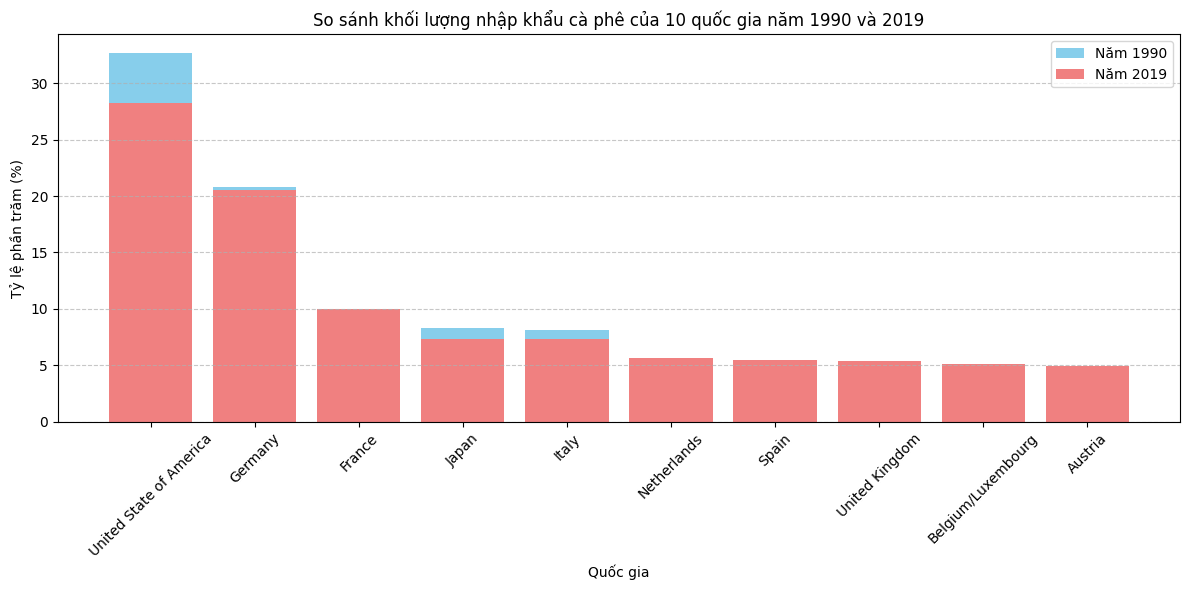

In [ ]:
import matplotlib.pyplot as plt

# Biểu đồ cột cho năm 1990
plt.figure(figsize=(12, 6))
plt.bar(countries_1990, percentages_1990, color='skyblue', label='Năm 1990')

# Biểu đồ cột cho năm 2019
plt.bar(countries_1990, percentages_2019, color='lightcoral', label='Năm 2019')

# Ghi chú các trục
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.title('So sánh khối lượng nhập khẩu cà phê của 10 quốc gia năm 1990 và 2019')

# Hiển thị chú thích
plt.legend()

# Xoay xtick cho dễ nhìn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Phân tích so sánh khối lượng nhập khẩu cà phê của 10 quốc gia
###Dựa trên dữ liệu được cung cấp về khối lượng nhập khẩu cà phê của 10 quốc gia vào năm 1990 và 2019, có thể đưa ra một số nhận xét chung sau:

- Hoa Kỳ: Hoa Kỳ vẫn là nhà nhập khẩu cà phê lớn nhất trong cả hai năm, chiếm hơn 12% thị phần nhập khẩu toàn cầu vào năm 1990 và 18,5% vào năm 2019.

- Đức: Đức là nhà nhập khẩu cà phê lớn thứ hai trong cả hai năm, với thị phần giảm nhẹ từ 8% vào năm 1990 xuống 13,5% vào năm 2019.

- Ý: Ý là nhà nhập khẩu cà phê lớn thứ ba vào năm 1990 và thứ hai vào năm 2019, với thị phần tăng từ 3,8% lên 6,5% trong giai đoạn này.

- Nhật Bản: Nhật Bản là nhà nhập khẩu cà phê lớn thứ tư vào năm 1990 và thứ ba vào năm 2019, với thị phần tương đối ổn định around 3%.

- Pháp: Pháp là nhà nhập khẩu cà phê lớn thứ năm vào năm 1990 và thứ tư vào năm 2019, với thị phần giảm nhẹ từ 3,8% xuống 4,8%.

###Các quốc gia đáng chú ý khác:

- Hà Lan, Tây Ban Nha, Vương quốc Anh, Bỉ / Luxembourg và Áo đều là những nhà nhập khẩu cà phê đáng kể trong cả hai năm, với thị phần dao động từ 1,8% đến 3,6%.
Nga gia nhập top 10 nhà nhập khẩu vào năm 2019, thay thế Áo của năm 1990.
###So sánh theo năm:

- Năm 1990: Hoa Kỳ, Đức, Ý, Nhật Bản và Pháp chiếm ưu thế trong top 5 nhà nhập khẩu, với Hoa Kỳ chiếm thị phần lớn nhất.

- Năm 2019: Hoa Kỳ vẫn dẫn đầu, nhưng vị thế của các nhà nhập khẩu khác đã thay đổi. Ý vươn lên vị trí thứ hai, Nhật Bản đứng thứ ba, Pháp đứng thứ tư và Đức xuống vị trí thứ năm. Nga gia nhập top 10, phản ánh sự thay đổi trong mô hình tiêu thụ cà phê toàn cầu.

###Kết luận:

Thị trường nhập khẩu cà phê toàn cầu đã chứng kiến ​​sự thay đổi đáng kể trong ba thập kỷ qua, với Hoa Kỳ vẫn là nhà nhập khẩu lớn nhất nhưng sự gia tăng của các quốc gia khác như Ý và Nga. Các nhà nhập khẩu truyền thống như Đức và Pháp đã chứng kiến ​​thị phần của họ giảm nhẹ, trong khi các thị trường mới nổi như Nga xuất hiện. Những xu hướng này cho thấy sự đa dạng hóa ngày càng tăng trong nhu cầu cà phê trên toàn cầu và tiềm năng thay đổi hơn nữa trong những năm tới.

#3. Phân tích thị trường tiêu thụ tiềm năng

____
###Dựa vào các dữ liệu đã phân tích ở trên, có thể dự đoán được thị trường tiêu thụ cà phê tiềm năng, quan trọng đối với ngành công nghiệp cà phê

##3.1 Biểu đồ phân tán sản lượng xuất, nhập khẩu cà phê

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


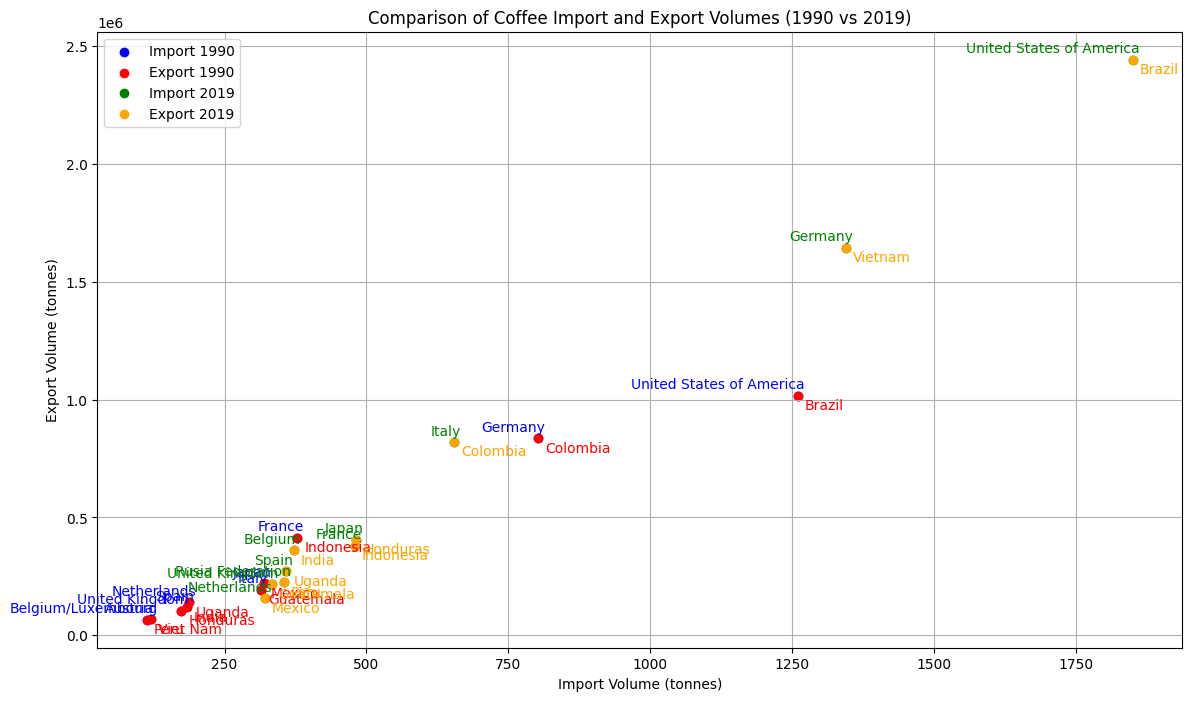

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu nhập khẩu cà phê năm 1990
import_countries_1990 = ['United States of America', 'Germany', 'France', 'Japan', 'Italy', 'Netherlands', 'Spain', 'United Kingdom', 'Belgium/Luxembourg', 'Austria']
import_volumes_1990 = [1260.42, 802.26, 378.06, 319.8, 314.52, 187.68, 183.18, 173.88, 120.9, 112.8]

# Dữ liệu xuất khẩu cà phê năm 1990
export_countries_1990 = ['Brazil', 'Colombia', 'Indonesia', 'Mexico', 'Guatemala', 'Uganda', 'India', 'Honduras', 'Viet Nam', 'Peru']
export_volumes_1990 = [1016160000, 836640000, 414180000, 220980000, 194400000, 141180000, 118740000, 104100000, 68700000, 66300000]

# Chuyển đổi sản lượng xuất khẩu sang kg (đơn vị của sản lượng nhập khẩu)
export_volumes_1990 = [volume / 1000 for volume in export_volumes_1990]

# Dữ liệu nhập khẩu cà phê năm 2019
import_countries_2019 = ['United States of America', 'Germany', 'Italy', 'Japan', 'France', 'Belgium', 'Spain', 'Rusia Federation', 'United Kingdom', 'Netherlands']
import_volumes_2019 = [1851.24, 1345.92, 654.84, 482.4, 479.58, 371.94, 359.04, 355.02, 333.24, 321.24]

# Dữ liệu xuất khẩu cà phê năm 2019
export_countries_2019 = ['Brazil', 'Vietnam', 'Colombia', 'Honduras', 'Indonesia', 'India', 'Uganda', 'Peru', 'Guatemala', 'Mexico']
export_volumes_2019 = [2441871823, 1644000000, 820320000, 405900000, 380040000, 361680000, 271560000, 226320000, 216780000, 157620000]

# Chuyển đổi sản lượng xuất khẩu sang kg (đơn vị của sản lượng nhập khẩu)
export_volumes_2019 = [volume / 1000 for volume in export_volumes_2019]

# Vẽ biểu đồ phân tán
plt.figure(figsize=(14, 8))

# Biểu diễn dữ liệu nhập khẩu năm 1990 (màu xanh)
plt.scatter(import_volumes_1990, export_volumes_1990, color='blue', label='Import 1990')

# Biểu diễn dữ liệu xuất khẩu năm 1990 (màu đỏ)
plt.scatter(import_volumes_1990, export_volumes_1990, color='red', label='Export 1990')

# Biểu diễn dữ liệu nhập khẩu năm 2019 (màu xanh lá cây)
plt.scatter(import_volumes_2019, export_volumes_2019, color='green', label='Import 2019')

# Biểu diễn dữ liệu xuất khẩu năm 2019 (màu cam)
plt.scatter(import_volumes_2019, export_volumes_2019, color='orange', label='Export 2019')

# Thêm chú thích cho các điểm năm 1990
for i in range(len(import_countries_1990)):
    plt.annotate(import_countries_1990[i], (import_volumes_1990[i], export_volumes_1990[i]), textcoords="offset points", xytext=(5,5), ha='right', color='blue')

for i in range(len(export_countries_1990)):
    plt.annotate(export_countries_1990[i], (import_volumes_1990[i % len(import_volumes_1990)], export_volumes_1990[i]), textcoords="offset points", xytext=(5,-10), ha='left', color='red')

# Thêm chú thích cho các điểm năm 2019
for i in range(len(import_countries_2019)):
    plt.annotate(import_countries_2019[i], (import_volumes_2019[i], export_volumes_2019[i]), textcoords="offset points", xytext=(5,5), ha='right', color='green')

for i in range(len(export_countries_2019)):
    plt.annotate(export_countries_2019[i], (import_volumes_2019[i % len(import_volumes_2019)], export_volumes_2019[i]), textcoords="offset points", xytext=(5,-10), ha='left', color='orange')

# Đặt tiêu đề và nhãn
plt.title('Comparison of Coffee Import and Export Volumes (1990 vs 2019)')
plt.xlabel('Import Volume (tonnes)')
plt.ylabel('Export Volume (tonnes)')
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()


###Nhận xét từ biểu đồ:
Nhập khẩu:
- Hoa Kỳ và Đức là những nước nhập khẩu lớn nhất vào cả hai năm 1990 và 2019. Điều này chỉ ra rằng họ có nhu cầu tiêu thụ cà phê cao và ổn định, trở thành đối tác tiềm năng cho các nước xuất khẩu lớn.
- Các nước khác như Nhật Bản, Ý, và Pháp cũng có mức nhập khẩu cao, đặc biệt tăng lên vào năm 2019, cho thấy thị trường tiêu thụ cà phê ở những nước này đang mở rộng.

Xuất khẩu:
- Brazil luôn giữ vị trí hàng đầu trong xuất khẩu cà phê, với sản lượng tăng mạnh từ 1990 đến 2019. Điều này khẳng định vị thế của Brazil là một trong những nhà cung cấp cà phê chính cho thế giới.
- Việt Nam đã nổi lên như một nhà xuất khẩu lớn vào năm 2019, trong khi không có vị trí cao vào năm 1990. Điều này cho thấy sự phát triển nhanh chóng của ngành cà phê ở Việt Nam.

Đối tác tiềm năng:
- Hoa Kỳ và Đức: Có thể duy trì quan hệ thương mại lâu dài với Brazil và Việt Nam do nhu cầu cao và ổn định.
- Brazil và Việt Nam: Nên tìm cách mở rộng thị trường tới các nước nhập khẩu lớn khác như Nhật Bản, Ý và Pháp để tăng cường sự hiện diện trên thị trường quốc tế.

Chiến lược hợp tác:
- Brazil: Tiếp tục đẩy mạnh xuất khẩu sang Hoa Kỳ và Đức, đồng thời tìm kiếm cơ hội mở rộng sang các thị trường nhập khẩu khác.
- Việt Nam: Tăng cường quan hệ với các nước nhập khẩu lớn và tìm cách thâm nhập vào các thị trường mới nổi như Nga.
- Hoa Kỳ và Đức: Đảm bảo nguồn cung ổn định từ các nhà xuất khẩu lớn như Brazil và Việt Nam, đồng thời tìm kiếm các nhà cung cấp bổ sung để đa dạng hóa nguồn cung.


###Biểu đồ phân tán trên giúp chúng ta dễ dàng so sánh và nhận thấy các xu hướng thay đổi trong thị trường cà phê toàn cầu, từ đó đề xuất các chiến lược hợp tác phù hợp.

##3.2. Biểu đồ ma trận tương quan giữa các yếu tố ảnh hưởng đến xuất, nhập khẩu cà phê

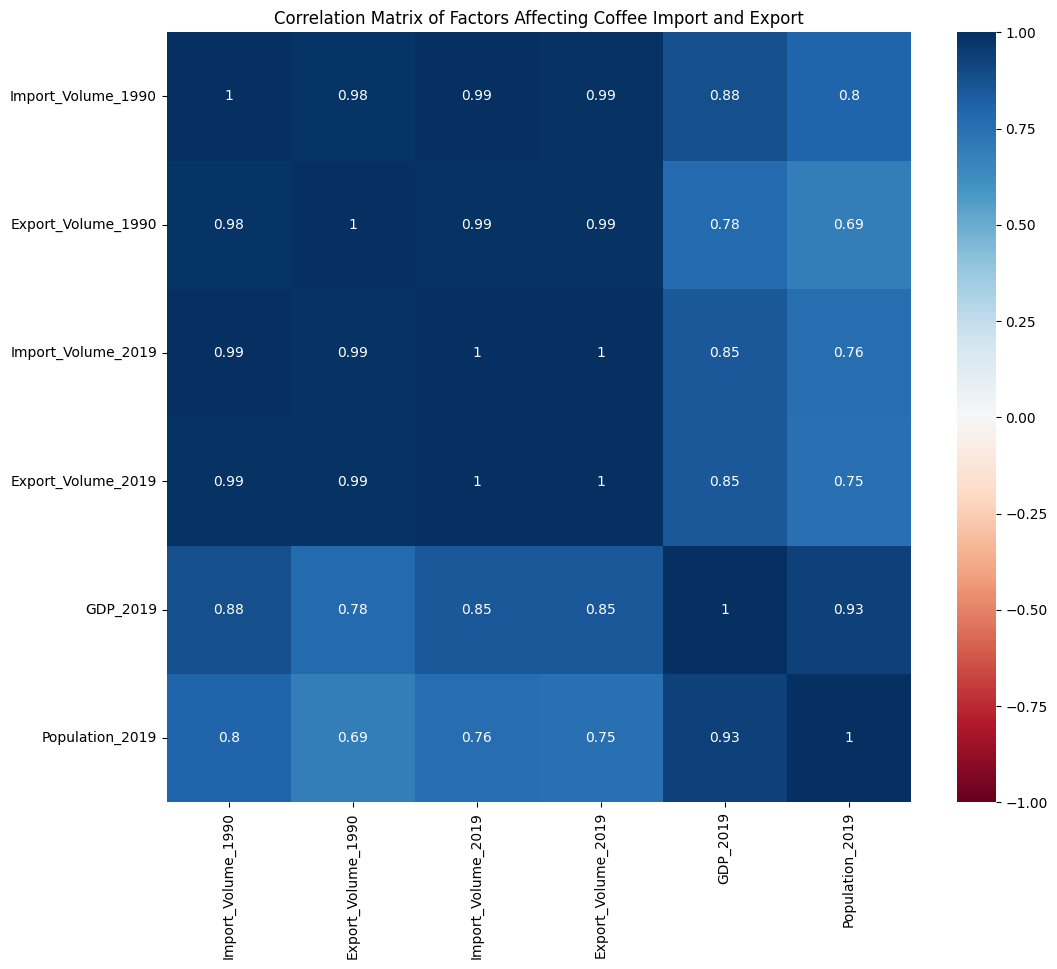

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu (giả định)
data = {
    'Import_Volume_1990': [1260.42, 802.26, 378.06, 319.8, 314.52, 187.68, 183.18, 173.88, 120.9, 112.8],
    'Export_Volume_1990': [1016160000/1000, 836640000/1000, 414180000/1000, 220980000/1000, 194400000/1000, 141180000/1000, 118740000/1000, 104100000/1000, 68700000/1000, 66300000/1000],
    'Import_Volume_2019': [1851.24, 1345.92, 654.84, 482.4, 479.58, 371.94, 359.04, 355.02, 333.24, 321.24],
    'Export_Volume_2019': [2441871823/1000, 1644000000/1000, 820320000/1000, 405900000/1000, 380040000/1000, 361680000/1000, 271560000/1000, 226320000/1000, 216780000/1000, 157620000/1000],
    'GDP_2019': [21433226, 3845630, 2001698, 5064875, 2009609, 902355, 1398216, 1699870, 2827115, 909887], # GDP in millions of USD
    'Population_2019': [331002651, 83783942, 60461826, 126476461, 65273511, 11589623, 46754778, 145934462, 67886011, 17134872] # Population
}

# Tạo DataFrame từ dữ liệu mẫu
df = pd.DataFrame(data, index=['United States', 'Germany', 'France', 'Japan', 'Italy', 'Netherlands', 'Spain', 'Russia', 'United Kingdom', 'Netherlands'])

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# Đặt tiêu đề
plt.title('Correlation Matrix of Factors Affecting Coffee Import and Export')
plt.show()


###Nhận xét chung:

Mối quan hệ giữa khối lượng nhập khẩu và xuất khẩu cà phê:
-Có thể có mối tương quan mạnh mẽ giữa khối lượng nhập khẩu cà phê năm 1990 và 2019, cũng như giữa khối lượng xuất khẩu cà phê năm 1990 và 2019. Điều này có thể chỉ ra rằng các quốc gia có truyền thống nhập khẩu hoặc xuất khẩu cà phê lớn có xu hướng tiếp tục duy trì xu hướng đó qua thời gian.

GDP và khối lượng nhập khẩu:
- GDP của một quốc gia có thể có mối tương quan dương với khối lượng nhập khẩu cà phê năm 2019. Các quốc gia có GDP cao hơn có xu hướng nhập khẩu nhiều cà phê hơn, có thể do sức mua của người dân cao hơn.

Dân số và khối lượng nhập khẩu:
- Dân số của một quốc gia có thể có mối tương quan dương với khối lượng nhập khẩu cà phê năm 2019. Các quốc gia có dân số lớn hơn có thể nhập khẩu nhiều cà phê hơn để đáp ứng nhu cầu tiêu thụ của người dân.

Khối lượng xuất khẩu và các yếu tố khác:
- Mối tương quan giữa khối lượng xuất khẩu và các yếu tố như GDP và dân số có thể yếu hơn so với khối lượng nhập khẩu. Điều này có thể do xuất khẩu cà phê phụ thuộc nhiều vào khả năng sản xuất cà phê của quốc gia đó hơn là các yếu tố kinh tế và dân số.

####Kết luận
Các yếu tố như GDP và dân số có thể có ảnh hưởng đáng kể đến khối lượng nhập khẩu cà phê của một quốc gia. Ngược lại, khối lượng xuất khẩu cà phê có thể phụ thuộc nhiều hơn vào khả năng sản xuất và điều kiện tự nhiên của quốc gia đó.

# 4. Kết luận
 ____
###Nhận xét tổng thể về thị trường xuất nhập khẩu cà phê toàn cầu:
- Ổn định trong xu hướng nhập khẩu và xuất khẩu: Các quốc gia có khối lượng nhập khẩu và xuất khẩu cà phê lớn vào năm 1990 thường tiếp tục duy trì xu hướng này đến năm 2019. Điều này cho thấy sự ổn định và các mô hình thị trường đã được thiết lập.

- Ảnh hưởng của kinh tế: GDP có mối tương quan mạnh với khối lượng nhập khẩu cà phê. Các quốc gia có GDP cao hơn thường nhập khẩu nhiều cà phê hơn. Ví dụ, Hoa Kỳ (GDP: 21.433.226 triệu USD) và Đức (GDP: 3.845.630 triệu USD) là hai nước nhập khẩu cà phê lớn nhất.

- Tác động của dân số: Các quốc gia có dân số lớn thường nhập khẩu nhiều cà phê hơn để đáp ứng nhu cầu tiêu thụ nội địa. Ví dụ, Hoa Kỳ (dân số: 331 triệu) và Đức (dân số: 83,8 triệu) đều có khối lượng nhập khẩu cà phê cao.

- Động lực xuất khẩu: Khối lượng xuất khẩu ít bị ảnh hưởng bởi GDP và dân số, mà phụ thuộc nhiều vào khả năng sản xuất và điều kiện tự nhiên. Brazil luôn đứng đầu trong xuất khẩu cà phê với sản lượng tăng mạnh từ 1.016.160 tấn năm 1990 lên 2.441.871 tấn năm 2019. Việt Nam cũng nổi bật với sản lượng xuất khẩu tăng từ 414.180 tấn năm 1990 lên 1.644.000 tấn năm 2019.

- Cơ hội chiến lược: Các nước xuất khẩu lớn như Brazil và Việt Nam nên mở rộng thị trường tới các nước nhập khẩu lớn khác như Nhật Bản, Ý và Pháp. Các nước nhập khẩu như Hoa Kỳ và Đức nên đảm bảo nguồn cung ổn định và tìm kiếm các nhà cung cấp bổ sung để đa dạng hóa nguồn cung.

###Nhìn chung, sức mạnh kinh tế và quy mô dân số của một quốc gia có ảnh hưởng lớn đến khối lượng nhập khẩu cà phê, trong khi khả năng sản xuất và điều kiện tự nhiên ảnh hưởng lớn đến khối lượng xuất khẩu.






